# Introduction

-----------------


This dataset contains house sale prices for King County, which includes Seattle. It's a great dataset for evaluating simple regression models. the dataset **House Sales in King County(USA)** will be use, it can be found at Kaggle.

# 1- EDA

------------

## A- Reading Data:


In [83]:
!pip install plotly

In [84]:
# import Necessary libraries
import plotly.express as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.float_format', lambda x: '%.2f' % x)
import statsmodels.api as sm
import statsmodels.formula.api as smf


%pylab inline
import statsmodels.formula.api as smf

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, scale
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


Populating the interactive namespace from numpy and matplotlib


In [85]:
# Load data
df = pd.read_csv('HouseSales.csv')

In [86]:
# Take a look at the first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [87]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [88]:
# How many rows and columns does the dataset have?
df.shape

(21613, 21)

In [89]:
# check statistical values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [90]:
# View the correlations
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


## B- Cleaning Data:

_______________

In [91]:
# Take a look at column names to notice  if we have the trailing whitespace problem
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [92]:
# check to null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [93]:
# convert the data type of bathrooms and floors features into int
df.bathrooms.round()
df.floors.round()

0       1.00
1       2.00
2       1.00
3       1.00
4       1.00
        ... 
21608   3.00
21609   2.00
21610   2.00
21611   2.00
21612   2.00
Name: floors, Length: 21613, dtype: float64

In [94]:
df.bathrooms=df.bathrooms.astype('int')
df.floors=df.floors.astype('int')
df.sqft_above=df.sqft_above.astype('int')


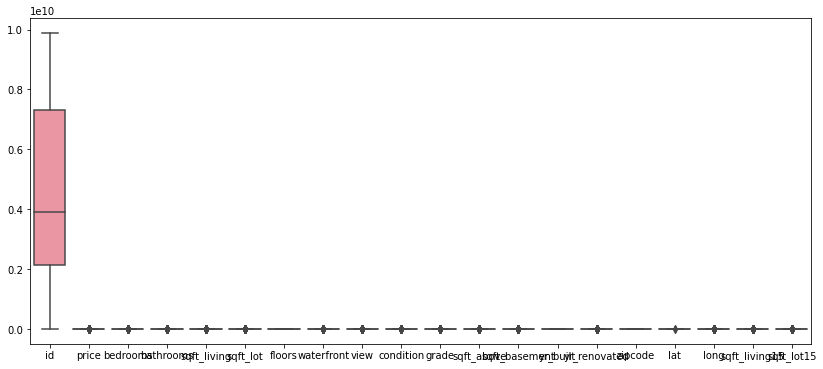

In [95]:
# check out layer value
plt.figure(figsize=[14,6])
sns.boxplot(data=df);

## C-  Answer Questions:

_________________

### Q1/ What is the most area space built for the houses In the King country USA?

_______________________

In [96]:
a= df.sqft_living.value_counts().head(10)
a

1300    138
1400    135
1440    133
1010    129
1660    129
1800    129
1820    128
1720    125
1480    125
1540    124
Name: sqft_living, dtype: int64

In [97]:
pl.bar(a)

### Q2/ Does the space of the house effect on the price?

--------------

In [98]:
groupd1=df.groupby(['sqft_living'])[['price']].mean().sort_values('price',ascending=False)
groupd1

,price
sqft_living,
12050,7700000.00
10040,7062500.00
9890,6885000.00
9200,5570000.00
8000,5350000.00
...,...
290,142000.00
844,139950.00
500,125000.00


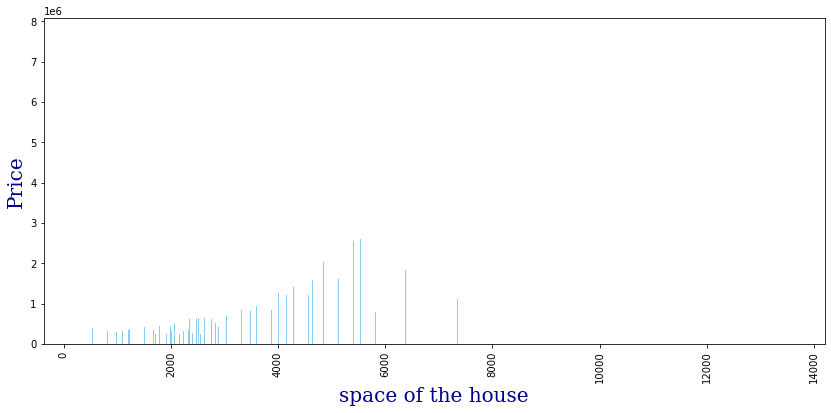

In [99]:
plt.figure(figsize=[14,6])
plt.bar(groupd1.index,groupd1.price, color='skyblue');
plt.xticks(rotation=90);
plt.xlabel('space of the house',fontsize=20,color='darkblue',family='serif');
plt.ylabel('Price',fontsize=20,color='darkblue',family='serif');
plt.savefig("q2.png", dpi=250)

### Q3/ What is the relationship between the height of the house land and the price of the house?

--------------

In [100]:
groupd2=df.groupby(['grade'])[['price']].mean().sort_values('price',ascending=False)
groupd2

,price
grade,
13,3709615.38
12,2191222.00
11,1496841.73
10,1071771.07
9,773513.19
8,542852.77
7,402590.26
6,301919.64
5,248523.97


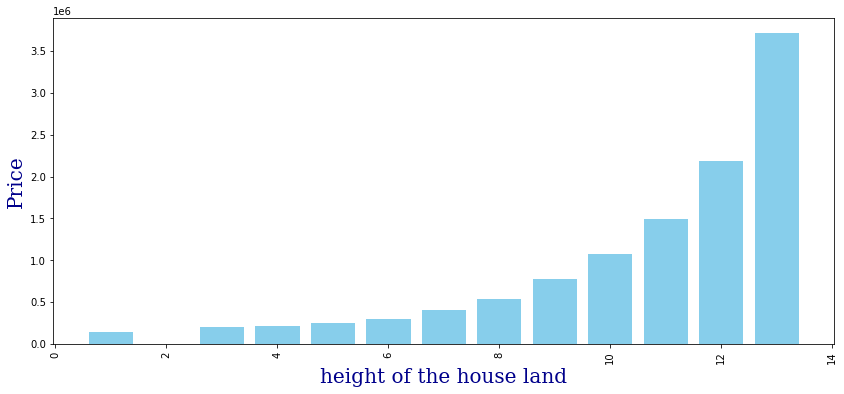

In [101]:
plt.figure(figsize=[14,6])
plt.bar(groupd2.index,groupd2.price, color='skyblue');
plt.xticks(rotation=90);
plt.xlabel('height of the house land',fontsize=20,color='darkblue',family='serif');
plt.ylabel('Price',fontsize=20,color='darkblue',family='serif');
plt.savefig("q3.png", dpi=250)

### Q4/ Are the waterfront houses more expensive than others?

--------------

In [102]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [103]:
x=df.groupby(['waterfront'])[['price']].mean().sort_values('price',ascending=False)
x

,price
waterfront,
1,1661876.02
0,531563.60


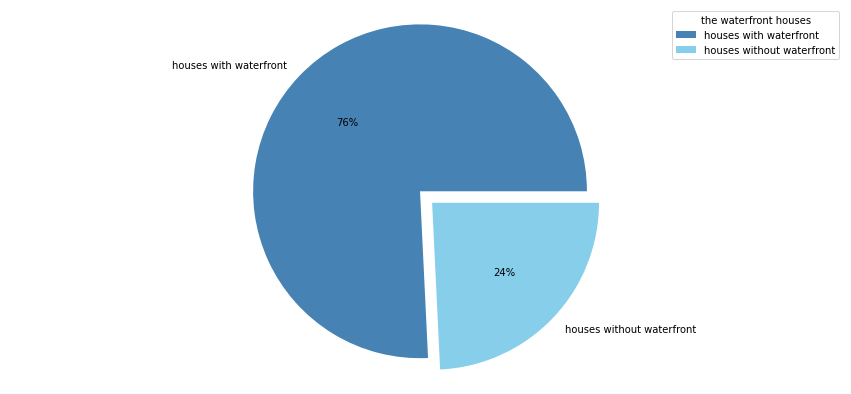

In [104]:
plt.figure(figsize=[15,7]);
plt.pie(x.price ,labels=['houses with waterfront','houses without waterfront'] , colors = ['steelblue','skyblue'], explode = (0,0.1), autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "the waterfront houses");
plt.savefig("q4.png", dpi=250)

# 2- Feature Selection:


------------


In [105]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,-0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.51,0.70,0.09,0.24,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.47,0.58,0.03,0.16,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,-0.00,0.51,0.47,1.00,0.70,0.09,0.48,0.06,0.18,-0.13,0.61,0.64,0.25,0.43,0.06,-0.16,0.03,0.18,0.51,0.08
sqft_living,-0.01,0.70,0.58,0.70,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.24,0.16,0.48,0.35,-0.01,1.00,0.02,0.02,-0.29,0.47,0.52,-0.24,0.58,-0.01,-0.10,0.03,0.16,0.30,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.18,0.28,0.07,0.02,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.29,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


In [106]:
#pick out just a few columns 
df2= df.loc[:,['price', 'bedrooms', 'bathrooms', 
                      'sqft_living', 'floors', 'waterfront', 'view', 
                      'condition', 'grade', 'yr_built','sqft_above','sqft_living15','lat']]

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int32  
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  int32  
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  sqft_above     21613 non-null  int32  
 11  sqft_living15  21613 non-null  int64  
 12  lat            21613 non-null  float64
dtypes: float64(2), int32(3), int64(8)
memory usage: 1.9 MB


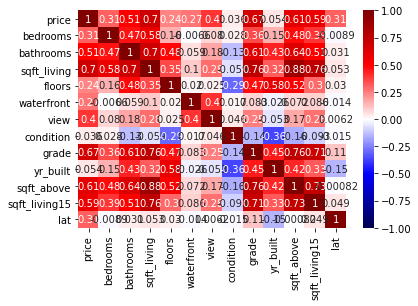

In [108]:
# example of a better corr matrix
sns.heatmap(df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

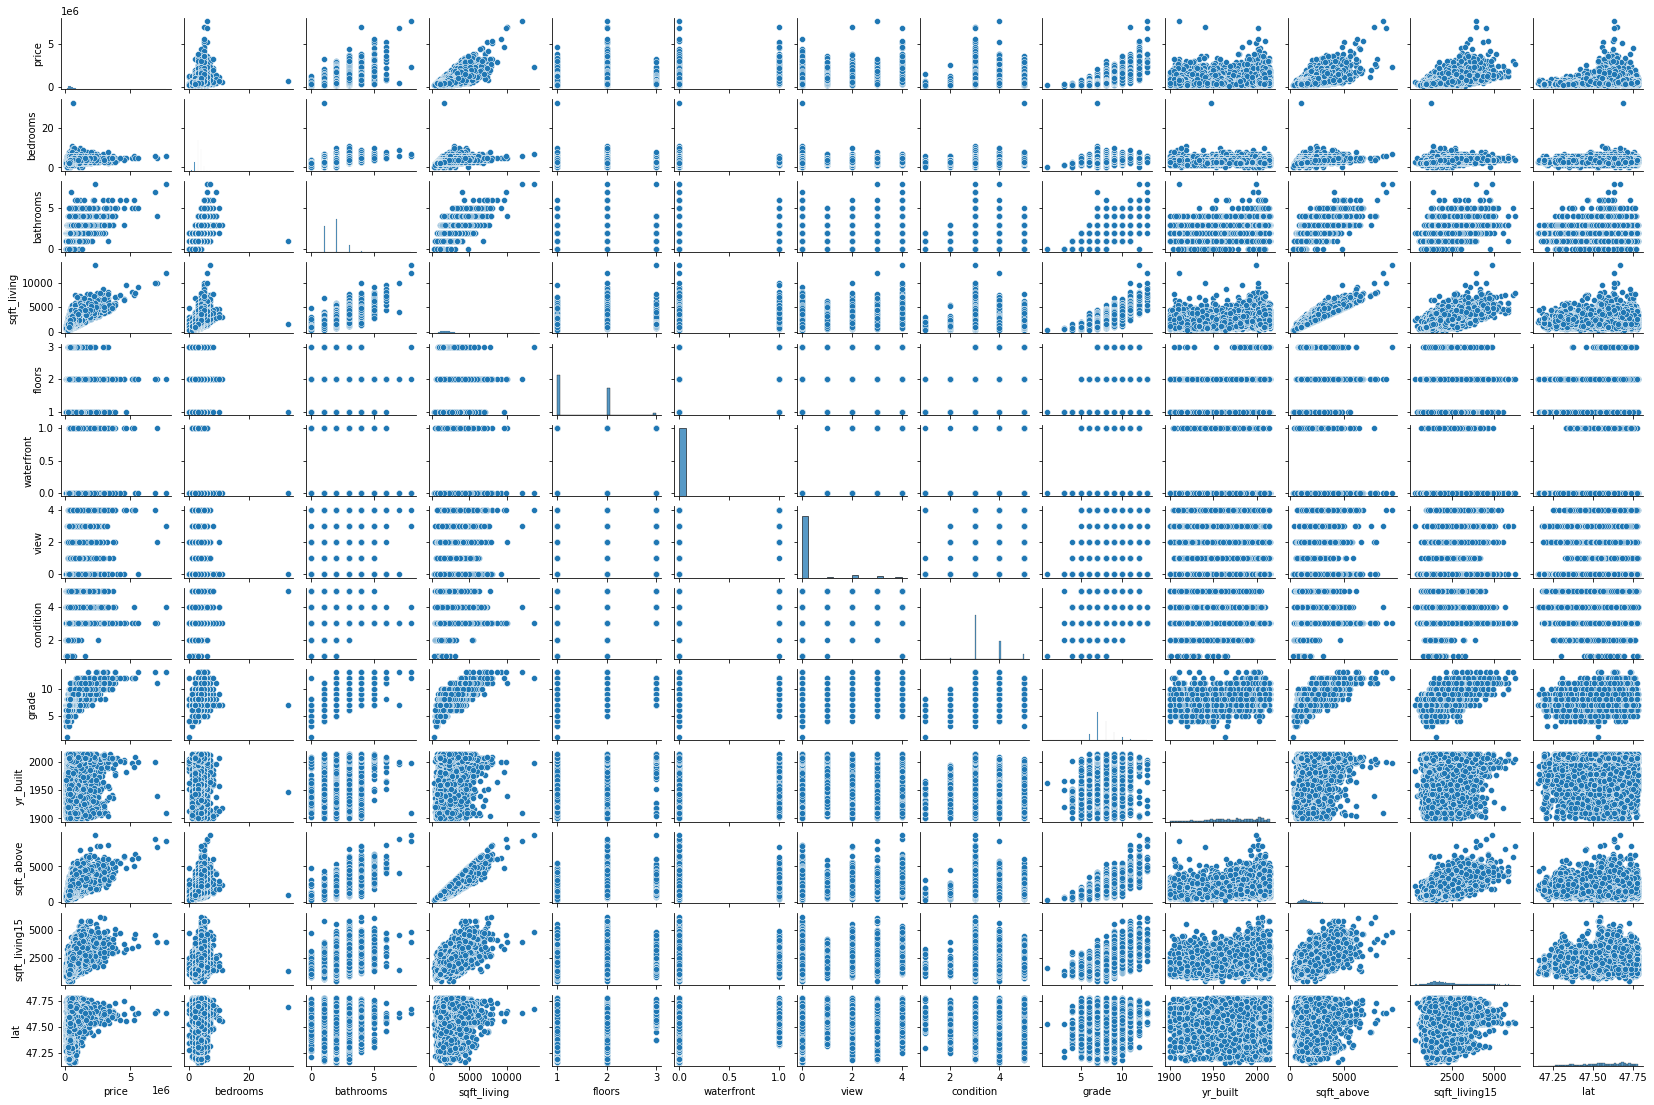

In [109]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df2, height=1.2, aspect=1.5);


# 3- Split Data:


------------

In [110]:
#Separate our features from our target
X = df2.loc[:,['bedrooms','bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_living15','lat']]
y = df2['price']

# 4- Feature Scailing:


------------

In [111]:
# Separate dataset into train and test 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=43)

# 5- ML (five model):


------------

 ## linear regression model

In [112]:
lm = LinearRegression()
lm.fit(X_train, y_train) # apply model
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.4f}') # show R^2 value train 
print("\n")
lm.fit(X,y) # apply model
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.4f}') # show R^2 val

Linear Regression val R^2: 0.6701


Linear Regression test R^2: 0.6608


In [113]:
a=lm.predict(X_test[:5])
a

array([ 448173.62494741,  761243.14884502, 1210275.84699736,
       1562793.07630757,  786467.20113219])

In [114]:
y_test[:5]

735      365000.00
2830     865000.00
4106    1038000.00
16218   1490000.00
19964    711000.00
Name: price, dtype: float64

 ## Standard Scaler regression model


In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)  # apply model
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge() # ridge regression model

lm_reg.fit(X_train_scaled, y_train) # apply model
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.4f}') # show R^2 value train 
print('\n')
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.4f}') # show R^2 value test

Ridge Regression val R^2: 0.6701


Ridge Regression test R^2: 0.6598


In [116]:
b=lm_reg.predict(X_test[:5])
b

array([3.49389482e+08, 4.90738516e+08, 6.26369604e+08, 7.52597869e+08,
       4.23035609e+08])

In [117]:
y_test[:5]

735      365000.00
2830     865000.00
4106    1038000.00
16218   1490000.00
19964    711000.00
Name: price, dtype: float64

## Decision Tree Regressor model

In [118]:
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)  # apply model
print(f'Decision tree val R^2: {regressor.score(X_val, y_val):.4f}')  # show R^2 value train
print('\n')
print(f'Decision tree test R^2: {regressor.score(X_test, y_test):.4f}')  # show R^2 value test

Decision tree val R^2: 0.6327


Decision tree test R^2: 0.5894


In [119]:
c=regressor.predict(X_test[:5])
c

array([ 365000.,  850000.,  917000., 2500000.,  802000.])

In [120]:
y_test[:5]

735      365000.00
2830     865000.00
4106    1038000.00
16218   1490000.00
19964    711000.00
Name: price, dtype: float64

## polynomial regression model

In [121]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression() 
lm_poly.fit(X_train_poly, y_train)  # apply model
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.4f}')  # show R^2 value train
print('\n')
print(f'polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.4f}')  # show R^2 value test

Degree 2 polynomial regression val R^2: 0.7667


polynomial regression test R^2: 0.7159


In [122]:
d=lm_poly.predict(X_test_poly[:5])
d

array([ 452488.85418415,  741986.24283981, 1234994.97099209,
       1794922.78426266,  731841.14866352])

In [123]:
y_test[:5]

735      365000.00
2830     865000.00
4106    1038000.00
16218   1490000.00
19964    711000.00
Name: price, dtype: float64

## RandomForest regression model

In [124]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
train_data_score=rf.score(X_train,y_train)
test_data_score=rf.score(X_test,y_test)
print(f' polynomial regression val R^2: {train_data_score:.4f}')  # show R^2 value train
print('\n')
print(f'polynomial regression test R^2: {test_data_score:.4f}')  # show R^2 value test

 polynomial regression val R^2: 0.9602


polynomial regression test R^2: 0.7756


In [125]:
f=rf.predict(X_test[:5])
f

array([ 387560.,  794190.,  942535., 1728699.,  755950.])

In [126]:
y_test[:5]

735      365000.00
2830     865000.00
4106    1038000.00
16218   1490000.00
19964    711000.00
Name: price, dtype: float64